In [38]:
import pandas as pd
import numpy as np
import seaborn as sns


In [10]:

df = pd.read_csv('./../output/slo_montly_data.csv', sep=';')
df.head()

,Group,Journey,AvailabilitySLA,AvailabilitySlo,ExperienceSlo,LatencySLA,LatencySlo,Feature,Source,year,...,month_name,total,ava,ava_prop,ava_debt,exp,exp_prop,exp_debt,lat,lat_debt
0,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Jan,399598.0,395000.0,0.988456,0.001544,391156.0,0.978908,0.011092,0.988277,0.011723
1,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Feb,392950.0,388520.0,0.988811,0.001189,384788.0,0.979183,0.010817,1.020870,0.000000
2,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Mar,418244.0,413587.0,0.988837,0.001163,409668.0,0.979533,0.010467,0.988957,0.011043
3,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,Apr,391036.0,386515.0,0.988369,0.001631,382628.0,0.978512,0.011488,0.998299,0.001701
4,Sales,Checkout Order,0.95,0.99,0.99,1000,1.0,Login,LoginController:PreLogin,2020.0,...,May,393065.0,388452.0,0.988266,0.001734,385088.0,0.979741,0.010259,1.000371,0.000000


In [15]:
df.columns

Index(['Group', 'Journey', 'AvailabilitySLA', 'AvailabilitySlo',
       'ExperienceSlo', 'LatencySLA', 'LatencySlo', 'Feature', 'Source',
       'year', 'month', 'month_name', 'total', 'ava', 'ava_prop', 'ava_debt',
       'exp', 'exp_prop', 'exp_debt', 'lat', 'lat_debt'],
      dtype='object')

In [33]:
def debt(x):
    print(x)
    t = x['AvailabilitySlo'] - x['ava_prop']
    return t if t >=0 else 0

avadf = df.groupby(['Group','Journey','month', 'month_name', 'AvailabilitySLA', 'AvailabilitySlo']).aggregate({ 'ava_prop': 'min'}).reset_index()
avadf['ava_debt'] = avadf['AvailabilitySlo'] - avadf['ava_prop']
avadf.loc[avadf['ava_debt'] < 0, 'ava_debt'] = 0


In [37]:
avadf.groupby(['month', 'month_name','Group']).aggregate({'ava_prop': 'mean', 'ava_debt': 'sum'}).reset_index()


,month,month_name,Group,ava_prop,ava_debt
0,1.0,Jan,Catalog,0.987489,0.000000
1,1.0,Jan,Channels,0.806125,0.183875
2,1.0,Jan,Identity,0.814837,0.515488
3,1.0,Jan,Loyalty,0.811895,0.168105
4,1.0,Jan,Profile,0.829078,0.150922
...,...,...,...,...,...
79,12.0,Dec,Identity,0.817016,0.508953
80,12.0,Dec,Loyalty,0.815572,0.164428
81,12.0,Dec,Profile,0.815572,0.164428
82,12.0,Dec,Sales,0.802735,0.551795


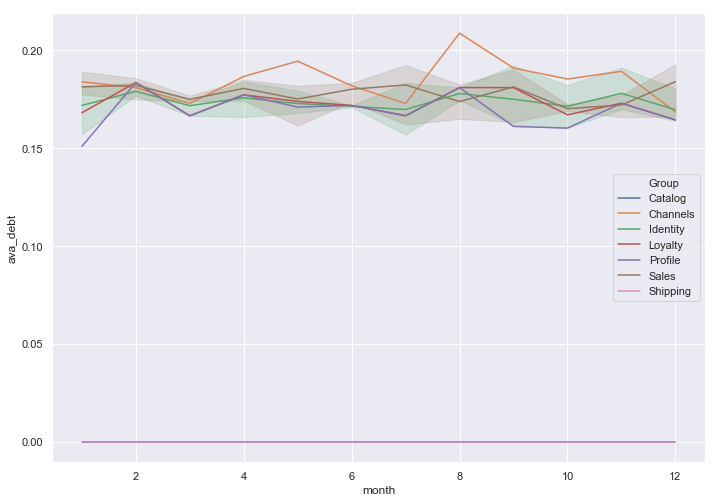

In [64]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='month', y='ava_debt', data=avadf, hue="Group")